In [46]:
#IMPORTING THE BASIC LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [47]:
INPUT_FOLDER='/Users/as186194/Documents/DOCUMENTS/TRIALS/Kaggle/Kaggle_Prima/pima-indians-diabetes-database/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
    if 'zip' not in f:
       print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
diabetes.csv                  23.87 KB
Prima_Diabetes.html           1231.61 KB
Prima_Diabetes.ipynb          984.34 KB
Prima_Diabetes.py             2.98 KB
Prima_Diabetes_Mean_replaced_valeus.py4.25 KB
Prima_Diabetes_Replaced_Mean_Values.ipynb1114.9 KB


In [48]:
#CREATING A DATAFRAME FOR THE MAIN FILE TO BE USED IN THE CODE
main_file=pd.read_csv(INPUT_FOLDER + 'diabetes.csv')
main_file.shape

(768, 9)

In [49]:
main_file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
main_file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
#COUNTING THE PEOPLE WITH AND WITHOUT DIABETES
main_file.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

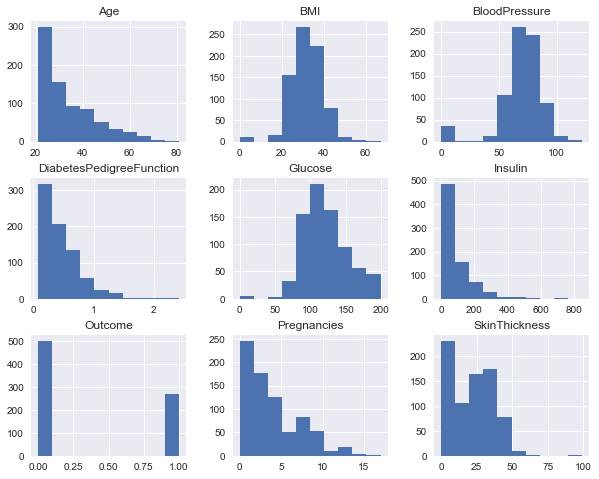

In [52]:
main_file.hist(figsize=(10,8))
plt.figure()
plt.show()

###### Replacing '0' values of the columns mentioned below with their respective column mode.

* BMI
* BLOOD PRESSURE
* GLUCOSE

In [53]:
bmi_mode=main_file["BMI"].mode()
main_file=main_file.replace({'BMI': {0: 32}}) 

In [54]:
bp_mode=main_file["BloodPressure"].mode()

In [55]:
bp_mode

0    70
dtype: int64

In [56]:
main_file=main_file.replace({'BloodPressure': {0: 70}}) 

In [57]:
glu_mode=main_file["Glucose"].mode()

In [58]:
glu_mode

0     99
1    100
dtype: int64

In [59]:
main_file=main_file.replace({'Glucose': {0: 99.5}}) 

In [60]:
main_file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.542318,72.295573,20.536458,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.488277,12.106756,15.952218,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.375000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


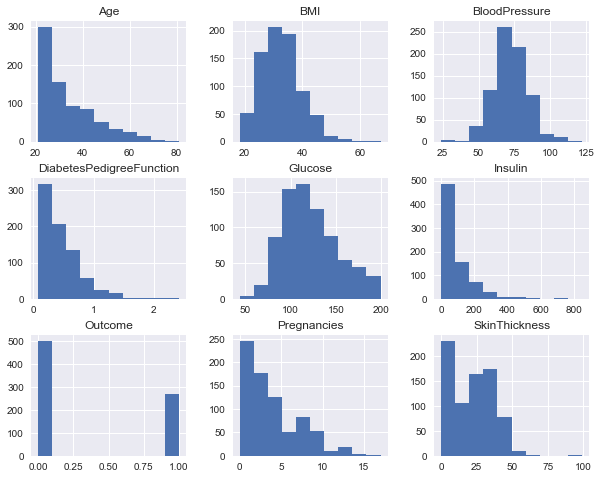

In [61]:
main_file.hist(figsize=(10,8))
plt.figure()
plt.show()

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

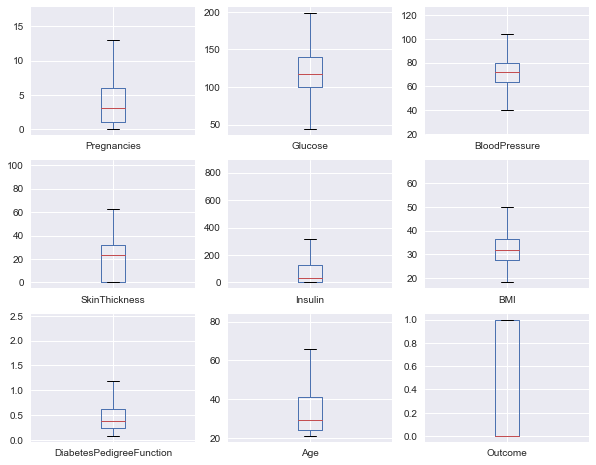

In [62]:
%matplotlib inline
main_file.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

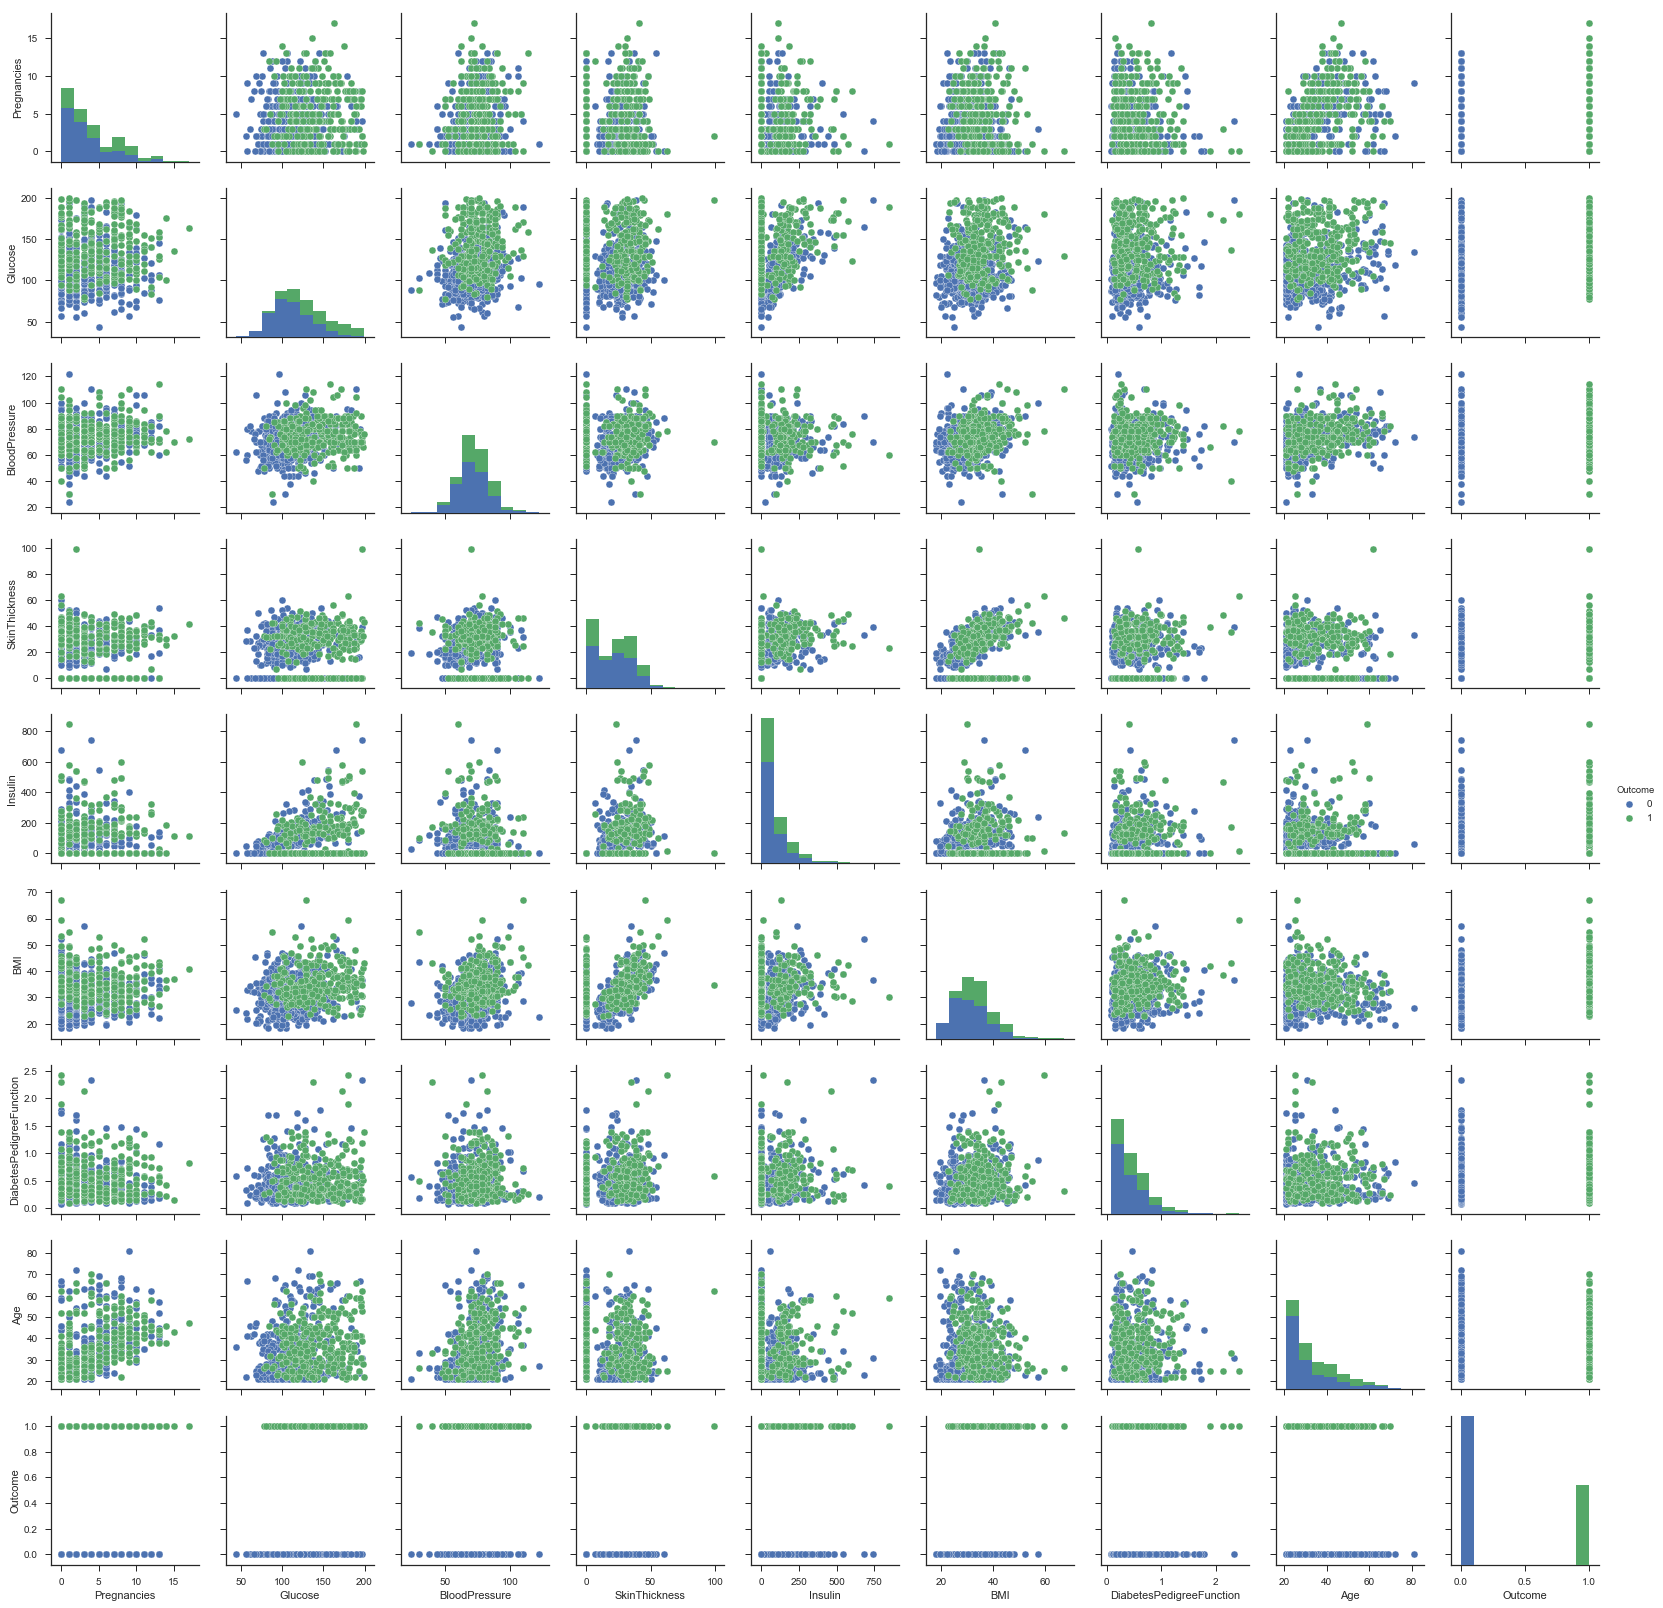

In [63]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(main_file, hue="Outcome")

###### Separating the data into Train & Test (80/20 split)

In [64]:
X = main_file.ix[:,0:8]
Y = main_file["Outcome"]
from sklearn import model_selection
X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=0.2)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [65]:
len(X_train)

614

In [66]:
len(X_test)

154

In [67]:
len(Y_train)

614

In [68]:
len(Y_test)

154

###### Importing different models to check for the best accuracy 

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [70]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    kfold = model_selection.KFold(n_splits=10)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.747488101534
LDA 0.749101004759
KNN 0.711872025383
CART 0.724748810153
RF 0.739397144368
NB 0.741142252776
SVM 0.633368588049


###### Visualizing the different model accuracies using a box plot

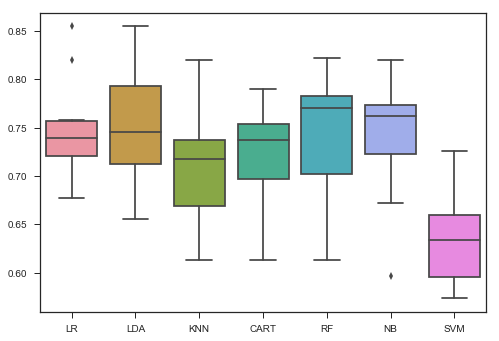

In [71]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

In [72]:
#FITTING THE LDA MODEL ON THE TEST DATASET
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions_lda = lda.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [74]:
print("Accuracy Score is:")
print(accuracy_score(Y_test, predictions_lda))
print()

Accuracy Score is:
0.805194805195



In [75]:
print("Classification Report:")
print(classification_report(Y_test, predictions_lda))

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.86      0.86       111
          1       0.64      0.67      0.66        43

avg / total       0.81      0.81      0.81       154



###### Creating a Confusion Matrix

In [76]:
conf = confusion_matrix(Y_test,predictions_lda)

In [77]:
conf

array([[95, 16],
       [14, 29]])

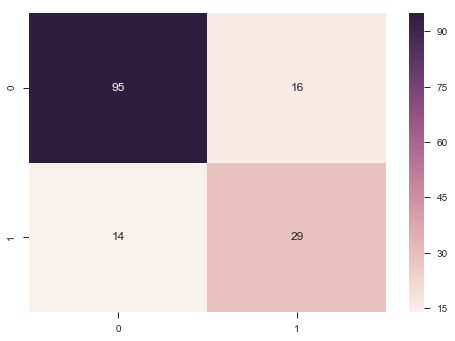

In [78]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)